In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

implement logsitic regression

In [18]:
class LR:
    def __init__(self,n, lr = 0.01, num_iter  =1000):
        self.lr = lr
        self.num_iter = num_iter
        self.theta = np.zeros(n)
        self.costs = np.zeros(num_iter )
        self.epsilon = 1e-5
    def sigmoid(self,theta,x):
        return 1.0/(1 + np.exp(-np.dot(theta,x.T)+self.epsilon))
    def cross_loss(self,y_hat,y):
        return -(1.0/y_hat.shape[0]) * np.sum(y*np.log(y_hat+self.epsilon)+(1-y)*np.log(1-y_hat+self.epsilon))
    def grad_theta(self, y_hat,x,y):
        return np.dot(x.T,(y_hat - y))
    def train(self,train, pred):
        for i in range(self.num_iter):          
          y_hat = self.sigmoid(self.theta,train)
          self.theta = self.theta- self.lr*self.grad_theta( y_hat,train,pred).T
          self.costs[i] = self.cross_loss(y_hat,pred)

    def predict(self,test):
          return self.sigmoid(self.theta,test),self.costs


# Draw the ROC curve

In [19]:
y = [0,2/6,4/6,1,1]
x = [0,0,1/4,2/4,1]

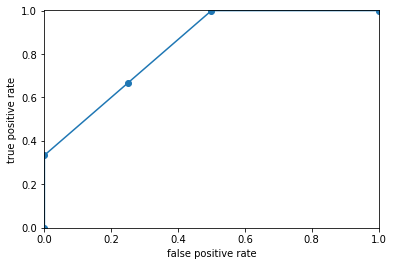

In [20]:
plt.xlim(-0.001,1.001)
plt.ylim(-0.001,1.001)
plt.plot(x, y, 'o-')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.savefig('roc_curve.png')

implement eculidean_distance using einstein noataion

In [45]:
def Eculidean_distance(x,y):
    #inspired by https://github.com/eth-cscs/SummerSchool2019/blob/master/topics/python-hpc/tutorials/euclidean-distance-matrix-numpy.ipynb
    x_ = np.expand_dims(np.einsum('ij,ij->i',x, x), axis=-1)
    y_ = np.einsum('ij,ij->i',y, y)
    xy_ = 2*np.dot(x,y.T)
    return x_+y_-xy_
#def calculate_neighbors(x,y):

## Programming 
Q1

In [46]:
d2z = np.loadtxt('D2z.txt')
x_location = d2z[:,:2]
label = d2z[:,2]

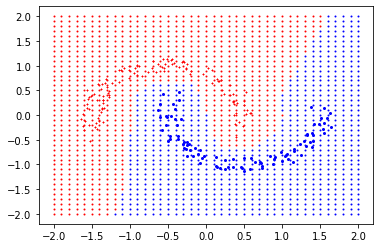

In [47]:
x = np.linspace(-2, 2, 41)
y = np.linspace(-2, 2, 41)
g = np.meshgrid(x,y)
position = np.append(g[0].reshape(-1,1),g[1].reshape(-1,1),axis=1)
dist_matrix = Eculidean_distance(x_location,position)
label_pos = []
for i in range(len(position)):
    label_pos.append(label[np.argmin(dist_matrix[:,i])])
label_pos = np.asarray(label_pos)
pos1 = position[label_pos ==1.0]
pos0 = position[label_pos ==0.0]
plt.plot(pos1[:,0],pos1[:,1],'.',color='red',markersize=2)
plt.plot(pos0[:,0],pos0[:,1],'.',color='blue',markersize=2)
x_location1 = x_location[label==1]
plt.plot(x_location1[:,0],x_location1 [:,1],'+',color='red',markersize=2)
x_location0 = x_location[label==0]
plt.plot(x_location0[:,0],x_location0 [:,1],'o',color='blue',markersize=2)
plt.savefig('p1p.png')

Q2

In [ ]:
##import emails.csv
emails_data = pd.read_csv('emails.csv')

Perform 5 fold validation

In [48]:
test1 = emails_data.values[:1000,1:-1].astype(dtype='float')
train1 = emails_data.values[1000:,1:-1].astype(dtype='float')
test1_label = emails_data.values[:1000,-1].astype(dtype='float')
fold1_label = emails_data.values[1000:,-1].astype(dtype='float')

In [49]:
test2 = emails_data.values[1000:2000,1:-1].astype(dtype='float')
test2_label  = emails_data.values[1000:2000,-1].astype(dtype='float')
train2 = np.concatenate((emails_data.values[:1000,1:-1],emails_data.values[2000:,1:-1])).astype(dtype='float')
fold2_label = np.concatenate((emails_data.values[:1000,-1],emails_data.values[2000:,-1])).astype(dtype='float')

In [50]:
test3 = emails_data.values[2000:3000,1:-1].astype(dtype='float')
test3_label  = emails_data.values[2000:3000,-1].astype(dtype='float')
train3 = np.concatenate((emails_data.values[:2000,1:-1],emails_data.values[3000:,1:-1])).astype(dtype='float')
fold3_label = np.concatenate((emails_data.values[:2000,-1],emails_data.values[3000:,-1])).astype(dtype='float')

In [51]:
test4 = emails_data.values[3000:4000,1:-1].astype(dtype='float')
test4_label  = emails_data.values[3000:4000,-1].astype(dtype='float')
train4 = np.concatenate((emails_data.values[:3000,1:-1],emails_data.values[4000:,1:-1])).astype(dtype='float')
fold4_label = np.concatenate((emails_data.values[:3000,-1],emails_data.values[4000:,-1])).astype(dtype='float')

In [52]:
test5 = emails_data.values[4000:,1:-1].astype(dtype='float')
test5_label  = emails_data.values[4000:,-1].astype(dtype='float')
train5 = emails_data.values[:4000,1:-1].astype(dtype='float')
fold5_label = emails_data.values[:4000,-1].astype(dtype='float')

In [53]:
X_train, X_test, y_train, y_test = train_test_split( emails_data.values[:,1:-1], emails_data.values[:,-1], test_size=0.2)

In [54]:
## use distnace as criteria
dist_matrixq2 = Eculidean_distance(test1,train1)
label_posq2 = []
for i in range(len(train1)):
    label_posq2.append(fold1_label[np.argmin(dist_matrixq2[:,i])])
label_posq2 = np.asarray(label_posq2)

In [55]:
accuracy_score(fold1_label , label_posq2 )

0.6135

In [57]:
## use KNeighborsClassifier from sklearn
var_const = vars()
for i in range(1,6):
  knnc = KNeighborsClassifier(n_neighbors=1)
  train_name = 'train{}'.format(i)
  test_name = 'test{}'.format(i)
  train_label = 'fold{}_label'.format(i)
  test_label = 'test{}_label'.format(i)
  knnc.fit(var_const[train_name], var_const[train_label] )
  y_pred = knnc.predict(var_const[test_name])
  print('1NN accuracy for fold {} is {}, precision is {}, and recall is {}'.format(i,accuracy_score(var_const[test_label], y_pred ), 
                                                               precision_score(var_const[test_label], y_pred ),
                                                               recall_score(var_const[test_label], y_pred) ))

1NN accuracy for fold 1 is 0.825, precision is 0.6544943820224719, and recall is 0.8175438596491228
1NN accuracy for fold 2 is 0.853, precision is 0.6857142857142857, and recall is 0.8664259927797834
1NN accuracy for fold 3 is 0.862, precision is 0.7212121212121212, and recall is 0.8380281690140845
1NN accuracy for fold 4 is 0.851, precision is 0.7164179104477612, and recall is 0.8163265306122449
1NN accuracy for fold 5 is 0.775, precision is 0.6057441253263708, and recall is 0.7581699346405228


In [58]:
for i in range(1,6):
  LR_ = LR(var_const[train_name].shape[1],lr = 0.005,num_iter  =2000)
  train_name = 'train{}'.format(i)
  test_name = 'test{}'.format(i)
  train_label = 'fold{}_label'.format(i)
  test_label = 'test{}_label'.format(i)
  LR_.train(var_const[train_name], var_const[train_label] )
  y_pred,loss_ = LR_.predict(var_const[test_name])

  print('1NN accuracy for fold {} is {}, precision is {}, and recall is {}'.format(i,accuracy_score(var_const[test_label], np.round(y_pred) ), 
                                                               precision_score(var_const[test_label], np.round(y_pred)),
                                                               recall_score(var_const[test_label], np.round(y_pred)) ))

1NN accuracy for fold 1 is 0.927, precision is 0.9045801526717557, and recall is 0.8315789473684211
1NN accuracy for fold 2 is 0.915, precision is 0.875, and recall is 0.8086642599277978
1NN accuracy for fold 3 is 0.908, precision is 0.9137931034482759, and recall is 0.7464788732394366
1NN accuracy for fold 4 is 0.903, precision is 0.9053497942386831, and recall is 0.7482993197278912
1NN accuracy for fold 5 is 0.878, precision is 0.815068493150685, and recall is 0.7777777777777778


In [59]:
var_const = vars()
n_neighbors = 1
accuracy_ = np.zeros(5)
precision_ = np.zeros(5)
recall_ = np.zeros(5)
k_ = [1,3,5,7,10]
count_=0
for k in k_:
    for i in range(1,6):
        neigh = KNeighborsClassifier(n_neighbors=k)
        train_name = 'train{}'.format(i)
        test_name = 'test{}'.format(i)
        train_label = 'fold{}_label'.format(i)
        test_label = 'test{}_label'.format(i)
        neigh.fit(var_const[train_name], var_const[train_label] )
        y_pred = neigh.predict(var_const[test_name])
        accuracy_[count_]+=accuracy_score(var_const[test_label], np.round(y_pred) )
        precision_[count_]+=precision_score(var_const[test_label], np.round(y_pred) )
        recall_[count_]+=recall_score(var_const[test_label], np.round(y_pred) )
    count_+=1

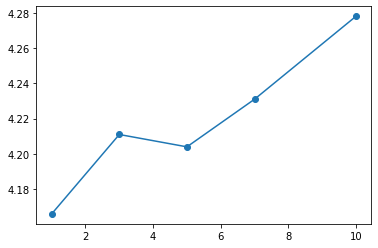

In [60]:
plt.plot(np.asarray(k_ ),accuracy_,'o-')
plt.savefig('q24.png')

In [61]:
knnc = KNeighborsClassifier(n_neighbors=5)
knnc.fit(emails_data.values[:4000, 1:-1].astype(dtype='float'), emails_data.values[:4000, -1].astype(dtype='float'))
y_pred = knnc.predict(emails_data.values[4000:, 1:-1].astype(dtype='float'))
fpr, tpr, threshold = roc_curve( emails_data.values[4000:, -1].astype(dtype='float'), np.round(y_pred))

lr_ = LR(emails_data.values[:4000, 1:-1].shape[1],lr = 0.01,num_iter  =1000)
lr_.train(emails_data.values[:4000, 1:-1].astype(dtype='float'), emails_data.values[:4000, -1].astype(dtype='float') )
y_pred1,loss_1 = lr_.predict(emails_data.values[4000:, 1:-1].astype(dtype='float'))
fpr1, tpr1, threshold1 = roc_curve(emails_data.values[4000:, -1].astype(dtype='float'), np.round(y_pred1))

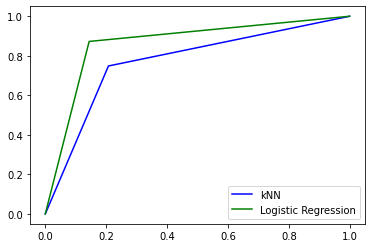

In [62]:
plt.plot(fpr, tpr,'b' ,label="kNN")
plt.plot(fpr1, tpr1,'g',label="Logistic Regression")
plt.legend(loc = 'lower right')
plt.savefig('q251.png')

In [63]:
lr_ = LR(emails_data.values[::, 1:-1].shape[1],lr = 0.005,num_iter  =2000)
lr_.train(emails_data.values[:, 1:-1].astype(dtype='float'), emails_data.values[:, -1].astype(dtype='float') )
y_pred1,loss_1 = lr_.predict(emails_data.values[:, 1:-1].astype(dtype='float'))
fpr1, tpr1, threshold1 = roc_curve(emails_data.values[:, -1].astype(dtype='float'), np.round(y_pred1))

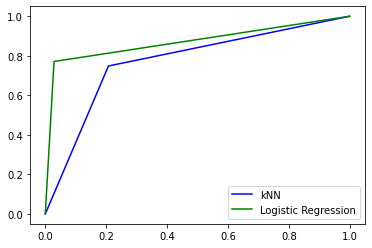

In [64]:
plt.plot(fpr, tpr,'b' ,label="kNN")
plt.plot(fpr1, tpr1,'g',label="Logistic Regression")
plt.legend(loc = 'lower right')
plt.savefig('q252.png')